In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [ ]:
import joblib


In [ ]:
file_path = '/content/drive/MyDrive/INTERNSHIP/codsoft/dataset/spam_sms/spam.csv'

df = pd.read_csv(file_path, encoding='latin-1')
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

In [ ]:
df['label'] = df['label'].map({"ham":0,"spam":1})

In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['label'].value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [ ]:
df.tail()

,label,message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


<Axes: title={'center': 'instance vs classes'}, xlabel='classes', ylabel='instance'>

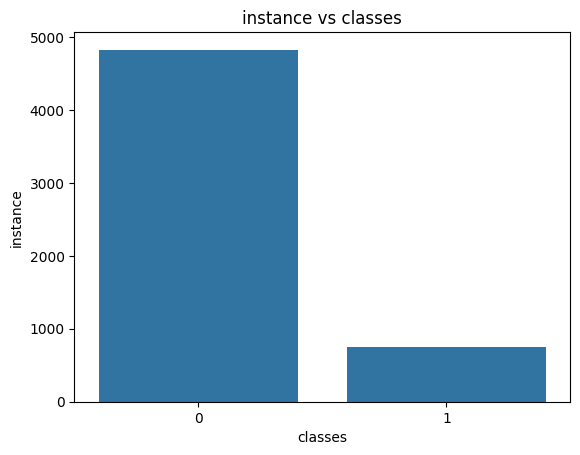

In [ ]:
plt.title("instance vs classes")
plt.xlabel("classes")
plt.ylabel("instance")
sns.barplot(x=df['label'].value_counts().index,y=df['label'].value_counts())

([<matplotlib.patches.Wedge at 0x7c4a6ebd2440>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

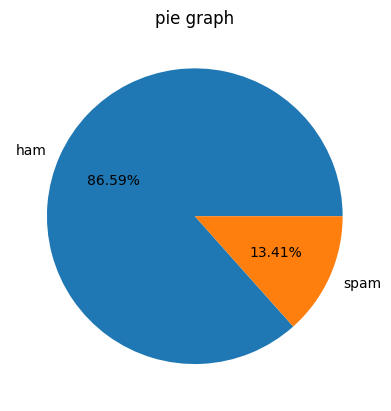

In [ ]:
plt.title("pie graph")
plt.pie(df['label'].value_counts(),labels=['ham','spam'],autopct="%0.2f%%")


In [ ]:
print(len(df['label']))
print(df.head())

5572
   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


In [ ]:
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['message'])
y = df['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NAIVE BAYES

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

logistic regression

In [ ]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

SVM

In [ ]:
svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [ ]:
def evaluate_model(y_test, y_pred):
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred)}")
    print(f"Recall: {recall_score(y_test, y_pred)}")
    print(f"F1 Score: {f1_score(y_test, y_pred)}")

print("Naive Bayes:")
evaluate_model(y_test, y_pred_nb)
print("\nLogistic Regression:")
evaluate_model(y_test, y_pred_lr)
print("\nSupport Vector Machine:")
evaluate_model(y_test, y_pred_svm)



Naive Bayes:
Accuracy: 0.9704035874439462
Precision: 1.0
Recall: 0.78
F1 Score: 0.8764044943820225

Logistic Regression:
Accuracy: 0.9632286995515695
Precision: 1.0
Recall: 0.7266666666666667
F1 Score: 0.8416988416988418

Support Vector Machine:
Accuracy: 0.9775784753363229
Precision: 1.0
Recall: 0.8333333333333334
F1 Score: 0.9090909090909091


In [ ]:
joblib.dump(nb_model, '/content/drive/MyDrive/INTERNSHIP/codsoft/model/spam sms/nb_spam_classifier.pkl')
joblib.dump(lr_model, '/content/drive/MyDrive/INTERNSHIP/codsoft/model/spam sms/lr_spam_classifier.pkl')
joblib.dump(svm_model, '/content/drive/MyDrive/INTERNSHIP/codsoft/model/spam sms/svm_spam_classifier.pkl')
joblib.dump(tfidf, '/content/drive/MyDrive/INTERNSHIP/codsoft/model/spam sms/tfidf_vectorizer.pkl')

['/content/drive/MyDrive/INTERNSHIP/codsoft/model/spam sms/tfidf_vectorizer.pkl']